In [1]:
import DSGRN

# Basic usage

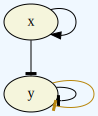

In [2]:
# <+> or <-> at the beginning of the network specification
# indicates positive or negative linear decay
# <-> is the default so it is optional
net_spec = 'x : <-> + x\n y : <+> - y - x y'

network = DSGRN.Network(net_spec, 'Ecology')

DSGRN.DrawGraph(network)

In [3]:
# ParameterGraphEcology creates the parameter graph with
# some parameters filtered out
parameter_graph = DSGRN.ParameterGraphEcology(network)

In [4]:
print("There are " + str(parameter_graph.size()) + " nodes in the parameter graph.")

There are 24 nodes in the parameter graph.


# Checking the parameter filtering

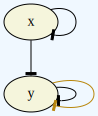

In [5]:
net_spec = 'x : <+> - x\n y : <+> - y - x y'

network = DSGRN.Network(net_spec, 'Ecology')

DSGRN.DrawGraph(network)

In [6]:
# Let's defined the full (unfiltered) parameter graph
# and the filtered Ecology parameter graph

# Full parameter graph
pg_full = DSGRN.ParameterGraph(network)

# Ecology parameter graph
pg = DSGRN.ParameterGraphEcology(network)

In [7]:
print("There are " + str(pg_full.size()) + " nodes in the full parameter graph.")
print("There are " + str(pg.size()) + " nodes in the ecology parameter graph.")

There are 36 nodes in the full parameter graph.
There are 24 nodes in the ecology parameter graph.


In [8]:
# Let's get the valid parameter indices in the full parameter graph
valid_indices = [pg.index2full_index(pi) for pi in range(pg.size())]

In [9]:
valid_indices

[1,
 2,
 4,
 5,
 7,
 8,
 10,
 11,
 13,
 14,
 16,
 17,
 19,
 20,
 22,
 23,
 25,
 26,
 28,
 29,
 31,
 32,
 34,
 35]

In [10]:
# Now let's get the indices that were filtered out
removed_indices = [pi for pi in range(pg_full.size()) if pi not in valid_indices]

In [11]:
removed_indices

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33]

In [12]:
# Let's print the partial order for the valid indices
for p_index in valid_indices:
    print(DSGRN.parameter_inequalities(pg_full, p_index))

['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p2, p4, p6, T[y->y, 0], p1, p3, p5, T[y->y, 1], p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p2, p4, p6, T[y->y, 0], T[y->y, 1], p1, p3, p5, p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p2, p4, T[y->y, 0], p1, p3, p5, p6, T[y->y, 1], p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p2, p4, T[y->y, 0], p6, T[y->y, 1], p1, p3, p5, p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p2, p4, T[y->y, 0], p1, p3, p5, T[y->y, 1], p6, p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p2, p4, T[y->y, 0], T[y->y, 1], p1, p3, p5, p6, p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p2, p4, p6, T[y->y, 0], p1, p3, p5, T[y->y, 1], p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p2, p4, p6, T[y->y, 0], T[y->y, 1], p1, p3, p5, p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p2, p4, T[y->y, 0], p1, p3, p5, p6, T[y->y, 1], p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p2, p4, T[y->y, 0], p6, 

In [13]:
# Let's print the partial order for the removed indices
for p_index in removed_indices:
    print(DSGRN.parameter_inequalities(pg_full, p_index))

['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, p6, T[y->y, 0], T[y->y, 1], p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, T[y->y, 0], p6, T[y->y, 1], p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, T[y->y, 0], T[y->y, 1], p6, p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, p6, T[y->y, 0], T[y->y, 1], p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, T[y->y, 0], p6, T[y->y, 1], p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, T[y->y, 0], T[y->y, 1], p6, p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, p6, T[y->y, 1], T[y->y, 0], p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, T[y->y, 1], p6, T[y->y, 0], p7)']
['x: (p0, T[x->x, 0], T[x->y, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, T[y->y, 1], T[y->y, 0], p6, p7)']
['x: (p0, T[x->y, 0], T[x->x, 0], p1)', 'y: (p0, p1, p2, p3, p4, p5, p6, 

# More examples

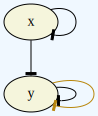

In [14]:
net_spec = 'x : <+> - x\n y : <+> - y - x y'

network = DSGRN.Network(net_spec, 'Ecology')

DSGRN.DrawGraph(network)

In [15]:
print('inputs:', network.inputs(0), network.inputs(1))
print('outputs:', network.outputs(0), network.outputs(1))
print('logics:', network.logic(0), network.logic(1))

inputs: [0] [1, 0, 1]
outputs: [0, 1] [1, 1]
logics: [[0]] [[1], [0, 1]]


In [16]:
network.domains()

[3, 3]

In [17]:
parameter_graph = DSGRN.ParameterGraphEcology(network)

In [18]:
print("There are " + str(parameter_graph.size()) + " nodes in the parameter graph.")

There are 24 nodes in the parameter graph.


In [19]:
database_fname = 'morse_database_all.json'

# Save the whole parameter graph
DSGRN.save_morse_graph_database_json(parameter_graph, database_fname)

In [20]:
par_index = 1

In [21]:
parameter = parameter_graph.parameter(par_index)

In [22]:
print(parameter)

[["x",[1,2,"C"],[0,1]],["y",[3,2,"CCCC"],[0,1]]]


In [23]:
# Get parameter inequalities
par_inequalities = DSGRN.parameter_inequalities(parameter_graph, par_index)

for inequality in par_inequalities:
    print(inequality)

x: (p0, T[x->x, 0], T[x->y, 0], p1)
y: (p0, p2, p4, p6, T[y->y, 0], T[y->y, 1], p1, p3, p5, p7)


In [24]:
domain_graph = DSGRN.DomainGraph(parameter)

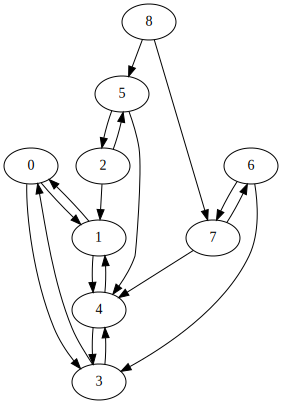

In [25]:
DSGRN.DrawGraph(domain_graph)

In [26]:
morse_decomposition = DSGRN.MorseDecomposition(domain_graph.digraph())

In [27]:
morse_graph = DSGRN.MorseGraph(domain_graph, morse_decomposition)

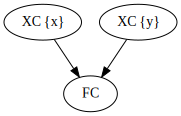

In [28]:
DSGRN.DrawGraph(morse_graph)

In [29]:
network = DSGRN.Network('x0 : <+> - x0 - x0 x1\n x1 : <+> - x1 - x1 x0', 'Ecology')

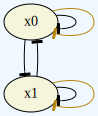

In [30]:
DSGRN.DrawGraph(network)

In [31]:
print('inputs:', network.inputs(0), network.inputs(1))
print('outputs:', network.outputs(0), network.outputs(1))
print('logics:', network.logic(0), network.logic(1))

inputs: [0, 0, 1] [1, 0, 1]
outputs: [0, 0, 1] [0, 1, 1]
logics: [[0], [0, 1]] [[1], [0, 1]]


In [32]:
network.domains()

[4, 4]

In [33]:
parameter_graph = DSGRN.ParameterGraphEcology(network)

In [34]:
print("There are " + str(parameter_graph.size()) + " nodes in the parameter graph.")

There are 3456 nodes in the parameter graph.


In [35]:
database_fname = 'morse_database.json'

# Parameter indices to save on database
param_indices = [0, 1, 3, 7, 9, 2]

DSGRN.save_morse_graph_database_json(parameter_graph, database_fname, param_indices)

In [36]:
par_index = 1273

In [37]:
parameter = parameter_graph.parameter(par_index)

In [38]:
print(parameter)

[["x0",[3,3,"E18618"],[0,2,1]],["x1",[3,3,"E58618"],[1,0,2]]]


In [39]:
# Get parameter inequalities
par_inequalities = DSGRN.parameter_inequalities(parameter_graph, par_index)

for inequality in par_inequalities:
    print(inequality)

x0: (p0, p2, p4, p6, T[x0->x0, 0], T[x0->x1, 0], p1, p3, p5, T[x0->x0, 1], p7)
x1: (p0, p2, p4, T[x1->x1, 0], p6, T[x1->x0, 0], p1, p3, p5, T[x1->x1, 1], p7)


In [40]:
domain_graph = DSGRN.DomainGraph(parameter)

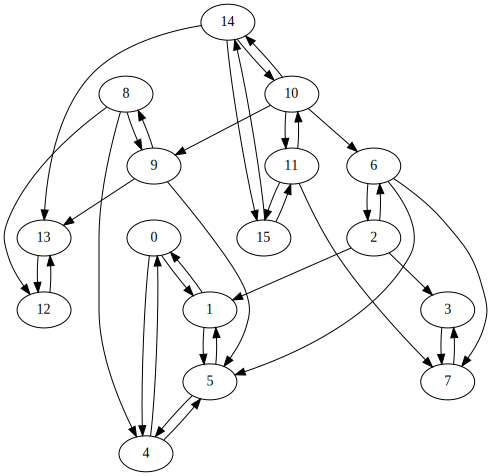

In [41]:
DSGRN.DrawGraph(domain_graph)

In [42]:
morse_decomposition = DSGRN.MorseDecomposition(domain_graph.digraph())

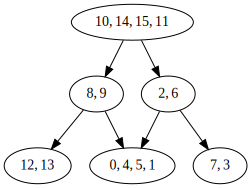

In [43]:
DSGRN.DrawGraph(morse_decomposition)

In [44]:
morsegraph = DSGRN.MorseGraph(domain_graph, morse_decomposition)

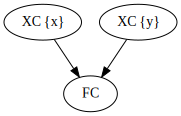

In [45]:
DSGRN.DrawGraph(morse_graph)